# Predicting EPL Salaries - Neural Networks

## The Data

We will be using a 2018-2019 English Premier League Players Dataset provided by https://footystats.org/download-stats-csv#whats_included

## Our Goal

Given the past season's data on player's characteristics and statistics can we build a model that can predict a player's salary? This way for future reference when we have a player negotiating a contract we can accurately provide a salary based upon their features.

The "annual_salary" column contains our label

## Data Overview

Here is the breakdown on this dataset : 

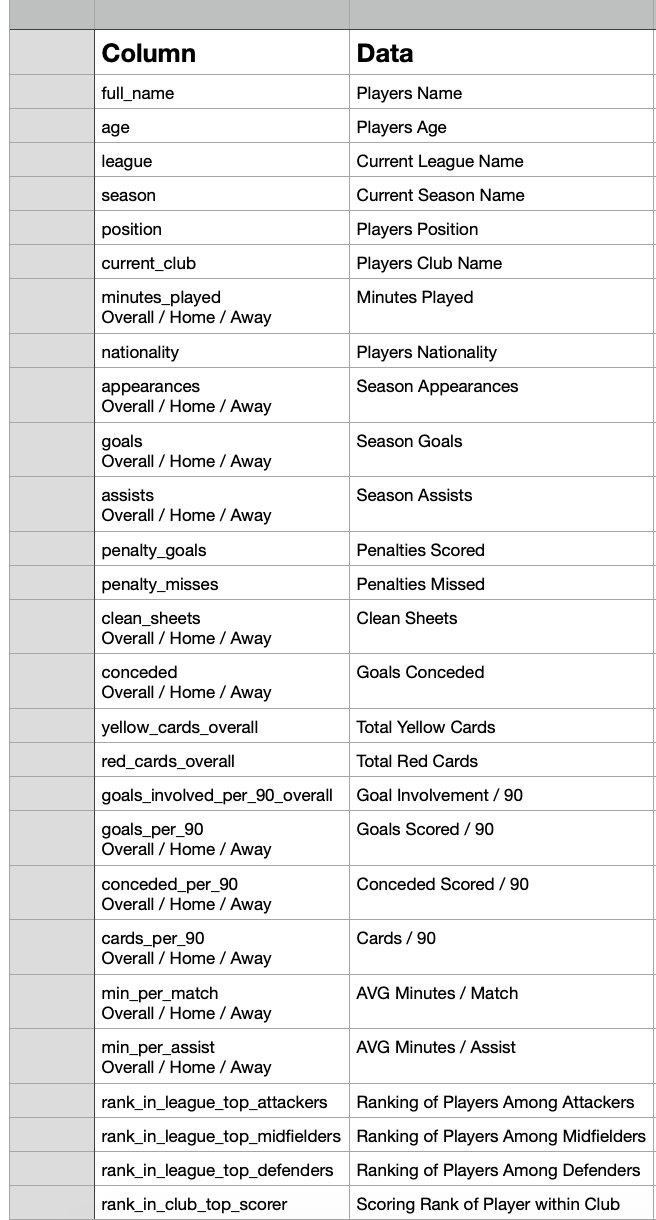

## Loading the data and other imports

In [1176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [1177]:
premier_league = pd.read_csv('premier_league_players.csv')

In [1178]:
premier_league.head()

,Unnamed: 0,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,292,193,80,20
1,1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,198,187,-1,10
2,2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,147,233,-1,3
3,3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [1179]:
premier_league.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1180]:
premier_league.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,572.0,2.740734e+01,4.675848e+00,0.0,2.400000e+01,2.800000e+01,3.000000e+01,4.100000e+01
birthday,572.0,7.098441e+08,1.441033e+08,0.0,6.188184e+08,7.061472e+08,8.165880e+08,1.001894e+09
minutes_played_overall,572.0,1.313014e+03,1.097064e+03,0.0,2.082500e+02,1.103500e+03,2.172500e+03,3.420000e+03
minutes_played_home,572.0,6.566923e+02,5.578173e+02,0.0,9.000000e+01,5.400000e+02,1.126250e+03,1.710000e+03
minutes_played_away,572.0,6.563217e+02,5.495346e+02,0.0,9.750000e+01,5.570000e+02,1.116500e+03,1.710000e+03
appearances_overall,572.0,1.832168e+01,1.287953e+01,0.0,5.750000e+00,1.900000e+01,3.000000e+01,3.800000e+01
appearances_home,572.0,7.307692e+00,6.391742e+00,0.0,1.000000e+00,6.000000e+00,1.300000e+01,1.900000e+01
appearances_away,572.0,7.307692e+00,6.276167e+00,0.0,1.000000e+00,6.000000e+00,1.300000e+01,1.900000e+01
goals_overall,572.0,1.818182e+00,3.474473e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,2.200000e+01
goals_home,572.0,1.005245e+00,2.148997e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01


# Section 1 : Web Scraping Player Salary Data

EPL Salary Rankings 2018-2019
https://www.spotrac.com/epl/rankings/2018/

In [1181]:
sal = pd.read_csv('Salaries.csv')
sal.columns

Index(['Unnamed: 0', 'full_name', 'annual_salary', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [1182]:
cols = [0,3,4]
sal.drop(sal.columns[cols],axis=1,inplace=True)
sal.head()

,full_name,annual_salary
0,Aaron Cresswell\nDEFENDER,"£2,600,000.00"
1,Aaron Lennon\nFORWARD,"£1,820,000.00"
2,Aaron Mooy\nMIDFIELDER,"£2,600,000.00"
3,Aaron Ramsey\nMIDFIELDER,"£6,240,000.00"
4,Aaron Wan-Bissaka\nDEFENDER,"£702,000.00"


In [1183]:
sal.columns = ['full_name','annual_salary']

In [1184]:
sal.head()

,full_name,annual_salary
0,Aaron Cresswell\nDEFENDER,"£2,600,000.00"
1,Aaron Lennon\nFORWARD,"£1,820,000.00"
2,Aaron Mooy\nMIDFIELDER,"£2,600,000.00"
3,Aaron Ramsey\nMIDFIELDER,"£6,240,000.00"
4,Aaron Wan-Bissaka\nDEFENDER,"£702,000.00"


In [1185]:
sal2 = sal['full_name'].str.split('\n',expand=True)
sal2.head()

,0,1
0,Aaron Cresswell,DEFENDER
1,Aaron Lennon,FORWARD
2,Aaron Mooy,MIDFIELDER
3,Aaron Ramsey,MIDFIELDER
4,Aaron Wan-Bissaka,DEFENDER


In [1186]:
sal2.drop(columns=[1],axis=1,inplace=True)

In [1187]:
sal2.head()

,0
0,Aaron Cresswell
1,Aaron Lennon
2,Aaron Mooy
3,Aaron Ramsey
4,Aaron Wan-Bissaka


In [1188]:
sal.drop(columns=['full_name'],axis=1,inplace=True)

In [1189]:
sal.head()

,annual_salary
0,"£2,600,000.00"
1,"£1,820,000.00"
2,"£2,600,000.00"
3,"£6,240,000.00"
4,"£702,000.00"


In [1190]:
sal = pd.concat([sal2,sal],axis=1)

In [1191]:
sal.head()

,0,annual_salary
0,Aaron Cresswell,"£2,600,000.00"
1,Aaron Lennon,"£1,820,000.00"
2,Aaron Mooy,"£2,600,000.00"
3,Aaron Ramsey,"£6,240,000.00"
4,Aaron Wan-Bissaka,"£702,000.00"


In [1192]:
sal.columns = ['full_name','annual_salary']

In [1193]:
sal.head()

,full_name,annual_salary
0,Aaron Cresswell,"£2,600,000.00"
1,Aaron Lennon,"£1,820,000.00"
2,Aaron Mooy,"£2,600,000.00"
3,Aaron Ramsey,"£6,240,000.00"
4,Aaron Wan-Bissaka,"£702,000.00"


In [1194]:
sal.reset_index(drop=True,inplace=True)

In [1195]:
sal['annual_salary'] = sal['annual_salary'].str.replace(',', '')


In [1196]:
sal['annual_salary'] = sal['annual_salary'].str.replace('£', '')


In [1197]:
sal.head()

,full_name,annual_salary
0,Aaron Cresswell,2600000.00
1,Aaron Lennon,1820000.00
2,Aaron Mooy,2600000.00
3,Aaron Ramsey,6240000.00
4,Aaron Wan-Bissaka,702000.00


## Joining the two dataframes

In [1198]:
premier_league = pd.merge(premier_league,sal,how='left',on=['full_name'])

In [1199]:
premier_league.isna().sum()['annual_salary']

146

In [1200]:
premier_league.head()

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,annual_salary
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,72,79,1589,1589,0.06,292,193,80,20,2600000.00
1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,61,76,1217,1217,0.07,198,187,-1,10,1820000.00
2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,51,80,582,2327,0.15,147,233,-1,3,2600000.00
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,111,47,0,221,0.00,69,8,-1,5,6240000.00
4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,69,35,0,0,0.00,-1,-1,-1,31,NaN


In [1201]:
# Going to Export the dataframe back to a csv discover
# and insert missing annual salary values for players

In [1202]:
#premier_league.to_csv('premier_league_players.csv')

The original annual salary was in pounds so to make it easier to comprehend we will convert the amount to US dollars based on the average exchange rate in 2018.
1.3349 USD

https://www.exchangerates.org.uk


In [1203]:
# Convert the target variable from an object to a float 
premier_league['annual_salary']= premier_league.annual_salary.astype(float)


In [1204]:
# Multiply by the 2018 exchange rate
premier_league['annual_salary'] = premier_league['annual_salary'] * 1.33490

In [1205]:
premier_league.head()

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,annual_salary
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,72,79,1589,1589,0.06,292,193,80,20,3470740.0
1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,61,76,1217,1217,0.07,198,187,-1,10,2429518.0
2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,51,80,582,2327,0.15,147,233,-1,3,3470740.0
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,111,47,0,221,0.00,69,8,-1,5,8329776.0
4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,69,35,0,0,0.00,-1,-1,-1,31,NaN


# Section 1 : Exploratory Data Analysis

Text(0.5, 1.0, 'Annual Salary Distribution')

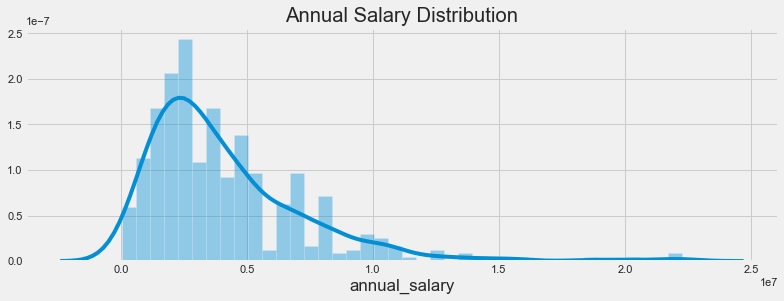

In [1220]:
plt.figure(figsize=(12,4))
sns.distplot(premier_league['annual_salary'],kde=True,bins=40)
plt.title('Annual Salary Distribution')


In [1207]:
premier_league['annual_salary'].value_counts()

3.470740e+06    26
2.429518e+06    26
2.776592e+06    22
6.941480e+06    21
2.082444e+06    21
                ..
3.748399e+06     1
4.135965e+06     1
2.013029e+07     1
1.318214e+06     1
7.219139e+06     1
Name: annual_salary, Length: 112, dtype: int64

In [1208]:
premier_league.corr()['annual_salary'].sort_values(ascending=False)

annual_salary                     1.000000
clean_sheets_overall              0.446407
goals_overall                     0.437043
clean_sheets_away                 0.434983
goals_home                        0.422588
assists_overall                   0.400909
goals_involved_per_90_overall     0.394133
clean_sheets_home                 0.394041
min_per_conceded_overall          0.390124
assists_away                      0.386582
goals_away                        0.376605
goals_per_90_overall              0.354129
goals_per_90_home                 0.331447
assists_home                      0.327126
goals_per_90_away                 0.294960
appearances_overall               0.276612
assists_per_90_overall            0.262658
appearances_away                  0.253519
penalty_goals                     0.252817
minutes_played_away               0.250602
minutes_played_overall            0.247817
minutes_played_home               0.239688
appearances_home                  0.236579
min_per_car

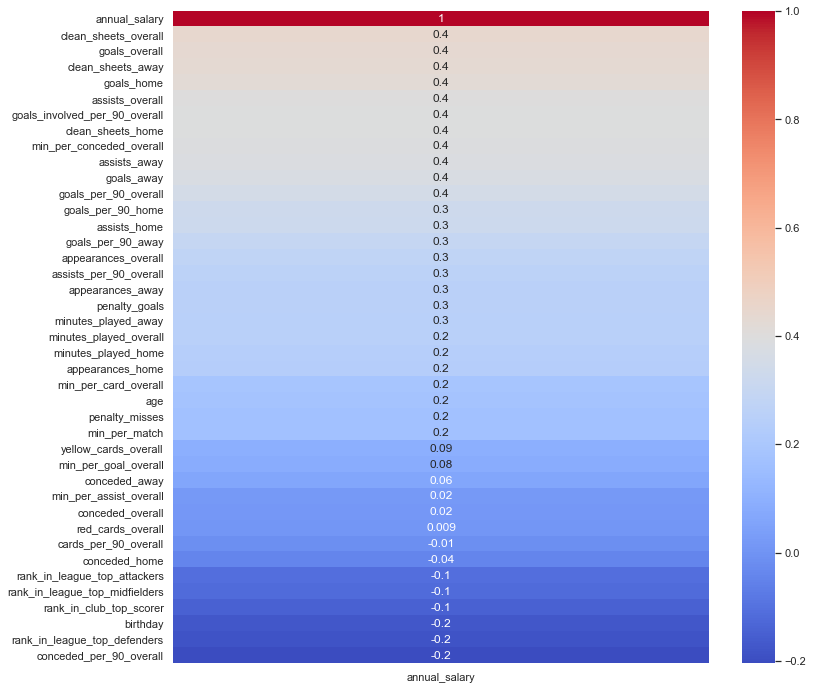

In [1209]:
#plt.title('Correlation heatmap of features in relation to annual_salary')
plt.figure(figsize=(12,12))
sns.heatmap(salary_corr[['annual_salary']].sort_values(by=['annual_salary'],ascending=False),cmap='coolwarm',annot=True,fmt='.1g')
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


Text(0.5, 1.0, 'Count of total clean sheets by player')

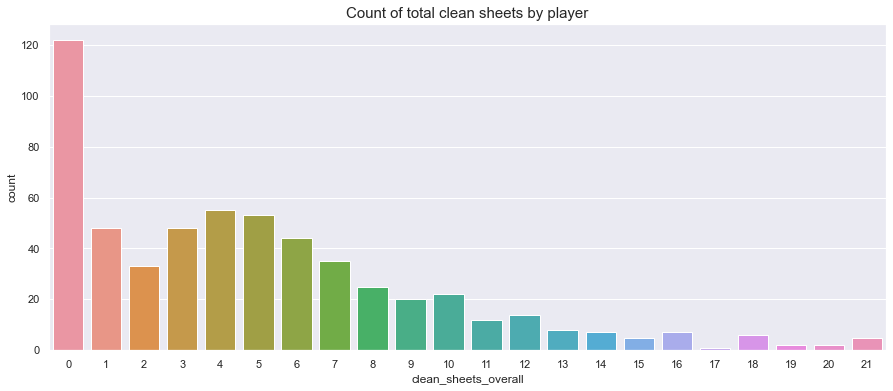

In [1210]:
plt.figure(figsize=(15,6))
sns.countplot(premier_league['clean_sheets_overall'])
plt.title('Count of total clean sheets by player',size=15)


Text(0.5, 1.0, 'Scatter plot of total goals in relation to salary')

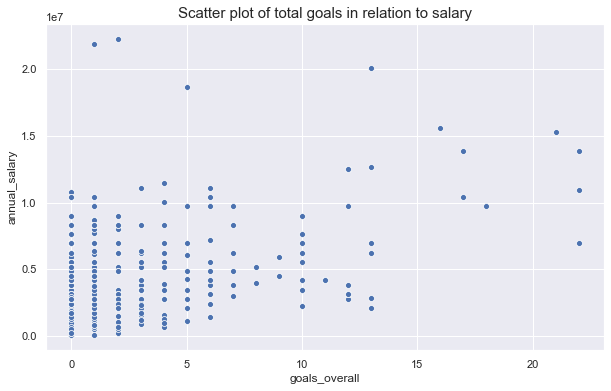

In [1211]:
# Scatter plot of total goals in relation to salary
plt.figure(figsize=(10,6))
sns.scatterplot(x='goals_overall',y='annual_salary',data=premier_league)
plt.title('Scatter plot of total goals in relation to salary',size=15)


In [1212]:
# Summary statistics of annual salary by position
premier_league.groupby('position')['annual_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,143.0,3.587753e+06,2.219596e+06,138829.60,1735370.0,3123666.0,4859036.0,1.145344e+07
Forward,81.0,5.036539e+06,3.991024e+06,645557.64,2429518.0,3748399.2,6247332.0,2.186566e+07
Goalkeeper,48.0,3.383221e+06,2.364816e+06,34707.40,1735370.0,2776592.0,4598730.5,1.041222e+07
Midfielder,156.0,4.457368e+06,3.630781e+06,48056.40,2082444.0,3470740.0,5553184.0,2.227058e+07


In [1213]:
club_order = sorted(premier_league['Current Club'].unique())

Text(0.5, 1.0, 'Distribution of position by team')

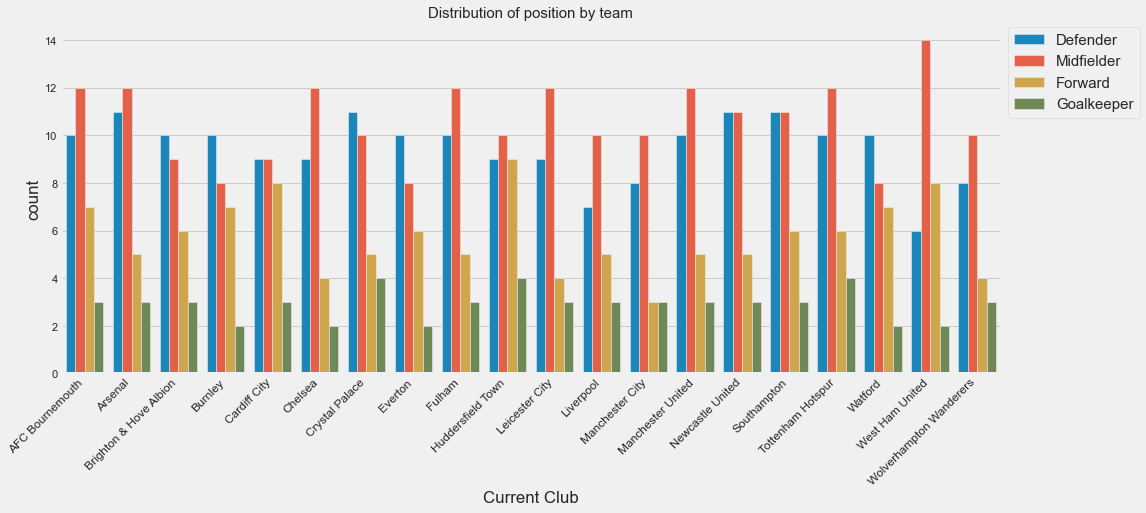

In [1217]:
# Distribution of position by team
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Current Club',hue='position',
              order = club_order,data=premier_league)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.86),prop={'size': 15})
plt.xticks(rotation=45, horizontalalignment= 'right')
plt.xticks(fontsize=12)
plt.title('Distribution of position by team', size = 15)

Text(0.5, 1.0, 'Distribution of salary spent by team')

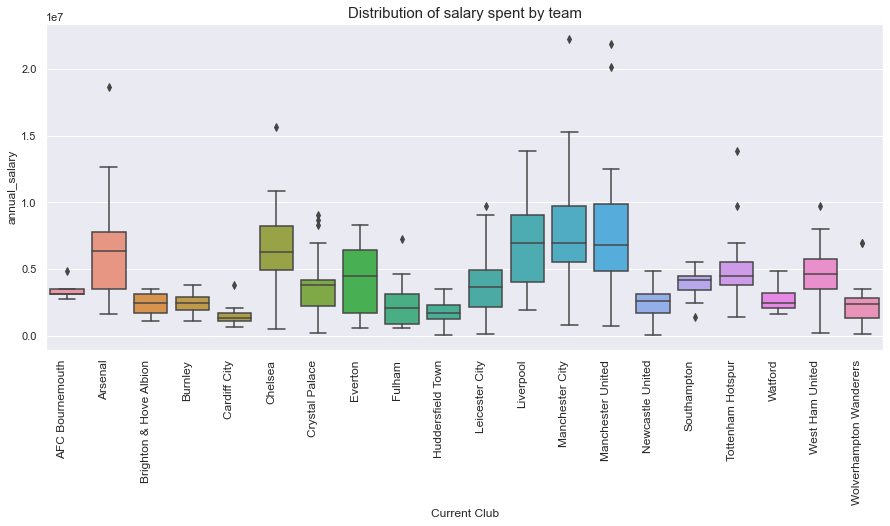

In [1215]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Current Club',y='annual_salary',
           order=club_order,data=premier_league
           )
plt.xticks(rotation=90, horizontalalignment= 'right')
plt.xticks(fontsize=12)
plt.title('Distribution of salary spent by team', size = 15)

In [1216]:
premier_league.groupby('nationality')['annual_salary'].mean()

nationality
Algeria      8.329776e+06
Argentina    4.722876e+06
Armenia      1.041222e+07
Australia    2.950129e+06
Austria      4.511962e+06
                 ...     
USA          1.978322e+06
Ukraine      4.685499e+06
Uruguay      5.206110e+06
Venezuela    4.164888e+06
Wales        2.552477e+06
Name: annual_salary, Length: 67, dtype: float64

In [137]:
premier_league.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 573
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       574 non-null    object 
 1   age                             574 non-null    int64  
 2   birthday                        574 non-null    int64  
 3   league                          574 non-null    object 
 4   season                          574 non-null    object 
 5   position                        574 non-null    object 
 6   Current Club                    574 non-null    object 
 7   minutes_played_overall          574 non-null    int64  
 8   minutes_played_home             574 non-null    int64  
 9   minutes_played_away             574 non-null    int64  
 10  nationality                     574 non-null    object 
 11  appearances_overall             574 non-null    int64  
 12  appearances_home                574 

# Section 2 : Data Preprocessing

Section Goals: 

1) Removing or filling any missing data

2) Removing unnecessary or repetitive features 

3) Converting categorical string features to dummy variables

In [139]:
premier_league.head()

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,annual_salary
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,72,79,1589,1589,0.06,292,193,80,20,3470740.0
1,Aaron Lennon,33,545529600,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,61,76,1217,1217,0.07,198,187,-1,10,2429518.0
2,Aaron Mooy,29,653356800,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,51,80,582,2327,0.15,147,233,-1,3,3470740.0
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,111,47,0,221,0.00,69,8,-1,5,8329776.0
4,Aaron Rowe,19,968284800,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,69,35,0,0,0.00,-1,-1,-1,31,NaN


# Missing Data

In [141]:
# We are very fortunate that we only have missing values in the 
# label annual_salary
premier_league.isnull().sum()

full_name                           0
age                                 0
birthday                            0
league                              0
season                              0
position                            0
Current Club                        0
minutes_played_overall              0
minutes_played_home                 0
minutes_played_away                 0
nationality                         0
appearances_overall                 0
appearances_home                    0
appearances_away                    0
goals_overall                       0
goals_home                          0
goals_away                          0
assists_overall                     0
assists_home                        0
assists_away                        0
penalty_goals                       0
penalty_misses                      0
clean_sheets_overall                0
clean_sheets_home                   0
clean_sheets_away                   0
conceded_overall                    0
conceded_hom

In [142]:
# 25% is missing
100 *premier_league.isnull().sum() / len(premier_league)

full_name                          0.00000
age                                0.00000
birthday                           0.00000
league                             0.00000
season                             0.00000
position                           0.00000
Current Club                       0.00000
minutes_played_overall             0.00000
minutes_played_home                0.00000
minutes_played_away                0.00000
nationality                        0.00000
appearances_overall                0.00000
appearances_home                   0.00000
appearances_away                   0.00000
goals_overall                      0.00000
goals_home                         0.00000
goals_away                         0.00000
assists_overall                    0.00000
assists_home                       0.00000
assists_away                       0.00000
penalty_goals                      0.00000
penalty_misses                     0.00000
clean_sheets_overall               0.00000
clean_sheet

In [146]:
# Let's fill in the annual_salary values based on the 
# clean_sheets_overall feature value as it correlates the 
# highest (44.6%) with the annual_salary of players
print("Mean of annual_salary column clean_sheets_overall")
premier_league.groupby('clean_sheets_overall').mean()['annual_salary']

clean_sheets_overall
0     2.206829e+06
1     2.631250e+06
2     4.002821e+06
3     3.504468e+06
4     3.616632e+06
5     3.204148e+06
6     5.093680e+06
7     5.308108e+06
8     3.561980e+06
9     2.952703e+06
10    5.602957e+06
11    4.805996e+06
12    6.032242e+06
13    5.618260e+06
14    7.438889e+06
15    1.012388e+07
16    6.767943e+06
17    1.110637e+07
18    8.672029e+06
19    1.249466e+07
20    5.726721e+06
21    8.052117e+06
Name: annual_salary, dtype: float64

In [147]:
clean_sheets_overall_avg = premier_league.groupby(
    'clean_sheets_overall').mean()['annual_salary']

In [149]:
clean_sheets_overall_avg[10]

5602956.7

In [150]:
def fill_annual_salary(clean_sheets_overall,annual_salary):
    
    if np.isnan(annual_salary):
        return clean_sheets_overall_avg[clean_sheets_overall]
    else:
        return annual_salary

In [151]:
premier_league['annual_salary'] = premier_league.apply(
lambda x: fill_annual_salary(x['clean_sheets_overall'], 
                             x['annual_salary']),axis=1)

In [152]:
premier_league.isnull().sum()['annual_salary']

0

## Categorical and Dummy Variables

In [154]:
premier_league.select_dtypes(['object']).columns

Index(['full_name', 'league', 'season', 'position', 'Current Club',
       'nationality'],
      dtype='object')

### full_name feature

In [157]:
# Since the name of the player is a unique identifier we 
# will drop it/ only 571 because of reoccuring names
premier_league['full_name'].nunique()

571

In [158]:
premier_league = premier_league.drop('full_name',axis=1)

### league feature

In [159]:
# All the data is from the Premier League so this column
# is not necessary
premier_league['league'].value_counts()

Premier League    574
Name: league, dtype: int64

In [160]:
premier_league = premier_league.drop('league',axis=1)

### season feature

In [162]:
# All the data is singular from the 2018-2019 season
# Let's drop it too / if we had data from other years we could keep it
premier_league['season'].value_counts()

2018/2019    574
Name: season, dtype: int64

In [163]:
premier_league = premier_league.drop('season',axis=1)

### position feature

In [165]:
# We have the four standard positions already set
# and we don't have to make any changes
# We are going to hot encode these to become dummy variables
premier_league['position'].value_counts()

Midfielder    212
Defender      189
Forward       115
Goalkeeper     58
Name: position, dtype: int64

In [166]:
dummies = pd.get_dummies(premier_league['position'],drop_first=True)
premier_league = premier_league.drop('position',axis=1)
premier_league = pd.concat([premier_league,dummies],axis=1)

In [167]:
# It worked as we now split our positions into their own respective
# dummy variables and removed the first to ensure there is no
# high correlation between our dummy variables
premier_league.head()

,age,birthday,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,...,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,annual_salary,Forward,Goalkeeper,Midfielder
0,30,629683200,West Ham United,1589,888,701,England,20,10,8,...,1589,0.06,292,193,80,20,3.470740e+06,0,0,0
1,33,545529600,Burnley,1217,487,730,England,16,5,9,...,1217,0.07,198,187,-1,10,2.429518e+06,0,0,1
2,29,653356800,Huddersfield Town,2327,1190,1137,Australia,29,13,12,...,2327,0.15,147,233,-1,3,3.470740e+06,0,0,1
3,29,662169600,Arsenal,1327,689,638,Wales,28,8,6,...,221,0.00,69,8,-1,5,8.329776e+06,0,0,1
4,19,968284800,Huddersfield Town,69,14,55,England,2,0,1,...,0,0.00,-1,-1,-1,31,2.206829e+06,1,0,0


In [169]:
premier_league.select_dtypes(['object']).columns

Index(['Current Club', 'nationality'], dtype='object')

### Current Club feature

In [170]:
premier_league['Current Club'].value_counts()

AFC Bournemouth            32
Tottenham Hotspur          32
Huddersfield Town          32
Arsenal                    31
Southampton                31
Crystal Palace             30
Manchester United          30
West Ham United            30
Fulham                     30
Newcastle United           30
Cardiff City               29
Brighton & Hove Albion     28
Leicester City             28
Chelsea                    27
Burnley                    27
Watford                    27
Everton                    26
Liverpool                  25
Wolverhampton Wanderers    25
Manchester City            24
Name: Current Club, dtype: int64

In [171]:
# Since we have all teams represented we will hot encode the 
# Current Club feature and utilize drop_first = True again
# 
premier_league['Current Club'].nunique()

20

In [172]:
dummies = pd.get_dummies(premier_league['Current Club'],drop_first=True)
premier_league = premier_league.drop('Current Club',axis=1)
premier_league = pd.concat([premier_league,dummies],axis=1)

In [174]:
premier_league.head()

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,...,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Tottenham Hotspur,Watford,West Ham United,Wolverhampton Wanderers
0,30,629683200,1589,888,701,England,20,10,8,0,...,0,0,0,0,0,0,0,0,1,0
1,33,545529600,1217,487,730,England,16,5,9,1,...,0,0,0,0,0,0,0,0,0,0
2,29,653356800,2327,1190,1137,Australia,29,13,12,3,...,0,0,0,0,0,0,0,0,0,0
3,29,662169600,1327,689,638,Wales,28,8,6,4,...,0,0,0,0,0,0,0,0,0,0
4,19,968284800,69,14,55,England,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### nationality feature

In [184]:
# Since most of the nationality data is skewed to being English
# and there are many values where only one nationality is 
# represented we will drop the nationality column
100 * premier_league['nationality'].value_counts() / len(premier_league)

England                37.979094
Spain                   6.097561
France                  5.400697
Republic of Ireland     3.484321
Belgium                 3.484321
                         ...    
New Zealand             0.174216
Benin                   0.174216
Curaçao                 0.174216
Israel                  0.174216
Romania                 0.174216
Name: nationality, Length: 67, dtype: float64

In [179]:
premier_league['nationality'].nunique()

67

In [186]:
premier_league = premier_league.drop('nationality',axis=1)

In [187]:
# All set to start creating the model
premier_league.select_dtypes(['object']).columns

Index([], dtype='object')

## Scaling and Train Test Split (1st run)

In [318]:
X = premier_league.drop('annual_salary',axis=1).values
y = premier_league['annual_salary']

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=5)

### Scaling

In [321]:
from sklearn.preprocessing import MinMaxScaler

In [322]:
scaler = MinMaxScaler()

In [323]:
X_train = scaler.fit_transform(X_train)

In [324]:
X_test = scaler.transform(X_test)

In [325]:
X_train.shape

(401, 62)

In [326]:
X_test.shape

(173, 62)

## Creating a Model

In [327]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [328]:
model = Sequential()

model.add(Dense(62,activation='relu'))
model.add(Dense(62,activation='relu'))
model.add(Dense(62,activation='relu'))
model.add(Dense(62,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [329]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         epochs=250)

Epoch 1/250
13/13 [==============================] - 0s 11ms/step - loss: 21586715344896.0000 - val_loss: 27183703654400.0000
Epoch 2/250
13/13 [==============================] - 0s 5ms/step - loss: 21586702761984.0000 - val_loss: 27183682682880.0000
Epoch 3/250
13/13 [==============================] - 0s 4ms/step - loss: 21586662916096.0000 - val_loss: 27183586213888.0000
Epoch 4/250
13/13 [==============================] - 0s 5ms/step - loss: 21586497241088.0000 - val_loss: 27183183560704.0000
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 21585838735360.0000 - val_loss: 27181814120448.0000
Epoch 6/250
13/13 [==============================] - 0s 4ms/step - loss: 21583835955200.0000 - val_loss: 27177829531648.0000
Epoch 7/250
13/13 [==============================] - 0s 5ms/step - loss: 21578448371712.0000 - val_loss: 27167878545408.0000
Epoch 8/250
13/13 [==============================] - 0s 4ms/step - loss: 21566016454656.0000 - val_loss: 27145663414272.0000

Epoch 67/250
13/13 [==============================] - 0s 4ms/step - loss: 5433480708096.0000 - val_loss: 6697133277184.0000
Epoch 68/250
13/13 [==============================] - 0s 4ms/step - loss: 5405710745600.0000 - val_loss: 6678685155328.0000
Epoch 69/250
13/13 [==============================] - 0s 4ms/step - loss: 5378514354176.0000 - val_loss: 6634062479360.0000
Epoch 70/250
13/13 [==============================] - 0s 4ms/step - loss: 5358909652992.0000 - val_loss: 6624995442688.0000
Epoch 71/250
13/13 [==============================] - 0s 4ms/step - loss: 5322279747584.0000 - val_loss: 6586720845824.0000
Epoch 72/250
13/13 [==============================] - 0s 3ms/step - loss: 5295276818432.0000 - val_loss: 6537419423744.0000
Epoch 73/250
13/13 [==============================] - 0s 4ms/step - loss: 5269484994560.0000 - val_loss: 6501271863296.0000
Epoch 74/250
13/13 [==============================] - 0s 4ms/step - loss: 5241244745728.0000 - val_loss: 6469323325440.0000
Epoch 75

Epoch 133/250
13/13 [==============================] - 0s 3ms/step - loss: 4180643938304.0000 - val_loss: 5397676556288.0000
Epoch 134/250
13/13 [==============================] - 0s 3ms/step - loss: 4166792773632.0000 - val_loss: 5423831187456.0000
Epoch 135/250
13/13 [==============================] - 0s 3ms/step - loss: 4156891856896.0000 - val_loss: 5404988801024.0000
Epoch 136/250
13/13 [==============================] - 0s 3ms/step - loss: 4144158736384.0000 - val_loss: 5412879335424.0000
Epoch 137/250
13/13 [==============================] - 0s 3ms/step - loss: 4145675239424.0000 - val_loss: 5442676719616.0000
Epoch 138/250
13/13 [==============================] - 0s 3ms/step - loss: 4127422414848.0000 - val_loss: 5400737873920.0000
Epoch 139/250
13/13 [==============================] - 0s 3ms/step - loss: 4124144041984.0000 - val_loss: 5389366067200.0000
Epoch 140/250
13/13 [==============================] - 0s 3ms/step - loss: 4111867314176.0000 - val_loss: 5379896377344.0000


13/13 [==============================] - 0s 4ms/step - loss: 3765052375040.0000 - val_loss: 5278043996160.0000
Epoch 199/250
13/13 [==============================] - 0s 4ms/step - loss: 3761141972992.0000 - val_loss: 5297534402560.0000
Epoch 200/250
13/13 [==============================] - 0s 4ms/step - loss: 3754623500288.0000 - val_loss: 5315243278336.0000
Epoch 201/250
13/13 [==============================] - 0s 4ms/step - loss: 3754105241600.0000 - val_loss: 5301429862400.0000
Epoch 202/250
13/13 [==============================] - 0s 4ms/step - loss: 3746439102464.0000 - val_loss: 5301505359872.0000
Epoch 203/250
13/13 [==============================] - 0s 4ms/step - loss: 3745246871552.0000 - val_loss: 5323169988608.0000
Epoch 204/250
13/13 [==============================] - 0s 4ms/step - loss: 3737569198080.0000 - val_loss: 5307249983488.0000
Epoch 205/250
13/13 [==============================] - 0s 4ms/step - loss: 3732919812096.0000 - val_loss: 5292210782208.0000
Epoch 206/250


In [330]:
losses = pd.DataFrame(model.history.history)

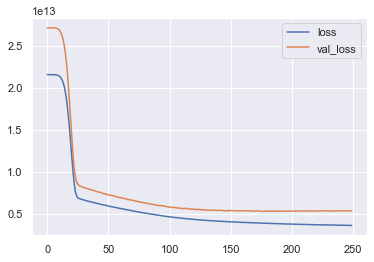

In [331]:
losses.plot()

# Evaluation on Test Data

In [332]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [333]:
predictions = model.predict(X_test)

In [334]:
# We are about 1.5 million off of the true salary values
mean_absolute_error(y_test,predictions)

1557000.4683485182

In [335]:
explained_variance_score(y_test,predictions)

0.49695914097665106

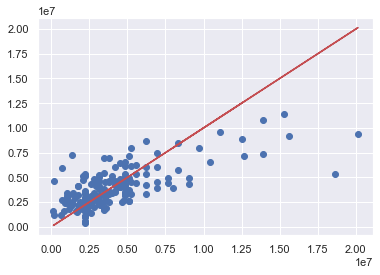

In [336]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

In [338]:
errors = y_test.values.reshape(173, 1) - predictions

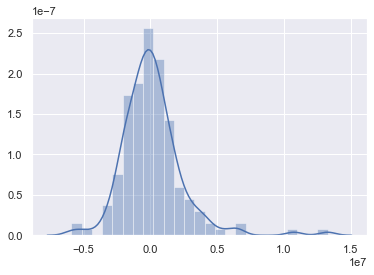

In [339]:
sns.distplot(errors)

## Scaling and Train Test Split (2nd run with Early Stopping)

In [287]:
X = premier_league.drop('annual_salary',axis=1).values
y = premier_league['annual_salary'].values

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=4)

### Scaling

In [290]:
from sklearn.preprocessing import MinMaxScaler

In [291]:
scaler = MinMaxScaler()

In [292]:
X_train = scaler.fit_transform(X_train)

In [293]:
X_test = scaler.transform(X_test)

In [294]:
X_train.shape

(401, 62)

In [295]:
X_test.shape

(173, 62)

## Creating a Model

In [296]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [297]:
model = Sequential()

model.add(Dense(62,activation='relu'))
model.add(Dense(31,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Early Stopping 

In [298]:
from tensorflow.keras.callbacks import EarlyStopping

In [299]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [300]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         epochs=1000,verbose=1,
         callbacks=[early_stop])

Epoch 1/1000
13/13 [==============================] - 0s 10ms/step - loss: 24217334579200.0000 - val_loss: 21086133551104.0000
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 24217328287744.0000 - val_loss: 21086118871040.0000
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 24217311510528.0000 - val_loss: 21086095802368.0000
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 24217269567488.0000 - val_loss: 21086030790656.0000
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 24217166807040.0000 - val_loss: 21085871407104.0000
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 24216923537408.0000 - val_loss: 21085516988416.0000
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 24216399249408.0000 - val_loss: 21084785082368.0000
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 24215331799040.0000 - val_loss: 21083400962

Epoch 66/1000
13/13 [==============================] - 0s 4ms/step - loss: 7110555336704.0000 - val_loss: 6422454075392.0000
Epoch 67/1000
13/13 [==============================] - 0s 3ms/step - loss: 7089131880448.0000 - val_loss: 6407824343040.0000
Epoch 68/1000
13/13 [==============================] - 0s 3ms/step - loss: 7066660896768.0000 - val_loss: 6380596494336.0000
Epoch 69/1000
13/13 [==============================] - 0s 3ms/step - loss: 7046120341504.0000 - val_loss: 6370860990464.0000
Epoch 70/1000
13/13 [==============================] - 0s 3ms/step - loss: 7023215247360.0000 - val_loss: 6352336322560.0000
Epoch 71/1000
13/13 [==============================] - 0s 3ms/step - loss: 7004331442176.0000 - val_loss: 6333047767040.0000
Epoch 72/1000
13/13 [==============================] - 0s 3ms/step - loss: 6982724485120.0000 - val_loss: 6300752150528.0000
Epoch 73/1000
13/13 [==============================] - 0s 3ms/step - loss: 6962918457344.0000 - val_loss: 6293920153600.0000


13/13 [==============================] - 0s 3ms/step - loss: 5922238234624.0000 - val_loss: 5343092408320.0000
Epoch 132/1000
13/13 [==============================] - 0s 3ms/step - loss: 5909628059648.0000 - val_loss: 5328250863616.0000
Epoch 133/1000
13/13 [==============================] - 0s 3ms/step - loss: 5890907308032.0000 - val_loss: 5323040489472.0000
Epoch 134/1000
13/13 [==============================] - 0s 3ms/step - loss: 5881595428864.0000 - val_loss: 5323602526208.0000
Epoch 135/1000
13/13 [==============================] - 0s 3ms/step - loss: 5861834489856.0000 - val_loss: 5291680727040.0000
Epoch 136/1000
13/13 [==============================] - 0s 3ms/step - loss: 5844422361088.0000 - val_loss: 5276645195776.0000
Epoch 137/1000
13/13 [==============================] - 0s 4ms/step - loss: 5829851348992.0000 - val_loss: 5272114823168.0000
Epoch 138/1000
13/13 [==============================] - 0s 4ms/step - loss: 5813250818048.0000 - val_loss: 5252976738304.0000
Epoch 1

13/13 [==============================] - 0s 4ms/step - loss: 5097824714752.0000 - val_loss: 4613398855680.0000
Epoch 197/1000
13/13 [==============================] - 0s 5ms/step - loss: 5083860828160.0000 - val_loss: 4570157154304.0000
Epoch 198/1000
13/13 [==============================] - 0s 4ms/step - loss: 5070072578048.0000 - val_loss: 4569590923264.0000
Epoch 199/1000
13/13 [==============================] - 0s 5ms/step - loss: 5061417631744.0000 - val_loss: 4558600273920.0000
Epoch 200/1000
13/13 [==============================] - 0s 5ms/step - loss: 5053477289984.0000 - val_loss: 4545002864640.0000
Epoch 201/1000
13/13 [==============================] - 0s 5ms/step - loss: 5045893464064.0000 - val_loss: 4528964894720.0000
Epoch 202/1000
13/13 [==============================] - 0s 4ms/step - loss: 5035875893248.0000 - val_loss: 4525105086464.0000
Epoch 203/1000
13/13 [==============================] - 0s 5ms/step - loss: 5027575365632.0000 - val_loss: 4529920671744.0000
Epoch 2

13/13 [==============================] - 0s 4ms/step - loss: 4655350808576.0000 - val_loss: 4180919975936.0000
Epoch 262/1000
13/13 [==============================] - 0s 3ms/step - loss: 4653435060224.0000 - val_loss: 4188820733952.0000
Epoch 263/1000
13/13 [==============================] - 0s 3ms/step - loss: 4648837054464.0000 - val_loss: 4185702006784.0000
Epoch 264/1000
13/13 [==============================] - 0s 3ms/step - loss: 4644437229568.0000 - val_loss: 4151914790912.0000
Epoch 265/1000
13/13 [==============================] - 0s 3ms/step - loss: 4636754837504.0000 - val_loss: 4147974766592.0000
Epoch 266/1000
13/13 [==============================] - 0s 3ms/step - loss: 4634854293504.0000 - val_loss: 4163099951104.0000
Epoch 267/1000
13/13 [==============================] - 0s 4ms/step - loss: 4629633957888.0000 - val_loss: 4171023777792.0000
Epoch 268/1000
13/13 [==============================] - 0s 3ms/step - loss: 4624767516672.0000 - val_loss: 4178528436224.0000
Epoch 2

13/13 [==============================] - 0s 3ms/step - loss: 4409808912384.0000 - val_loss: 4005915000832.0000
Epoch 327/1000
13/13 [==============================] - 0s 4ms/step - loss: 4407531405312.0000 - val_loss: 4007426785280.0000
Epoch 328/1000
13/13 [==============================] - 0s 3ms/step - loss: 4403314556928.0000 - val_loss: 4000078102528.0000
Epoch 329/1000
13/13 [==============================] - 0s 3ms/step - loss: 4400233316352.0000 - val_loss: 4003343892480.0000
Epoch 330/1000
13/13 [==============================] - 0s 3ms/step - loss: 4399043182592.0000 - val_loss: 4010500161536.0000
Epoch 331/1000
13/13 [==============================] - 0s 3ms/step - loss: 4395829821440.0000 - val_loss: 4006939459584.0000
Epoch 332/1000
13/13 [==============================] - 0s 3ms/step - loss: 4392719220736.0000 - val_loss: 3991836295168.0000
Epoch 333/1000
13/13 [==============================] - 0s 4ms/step - loss: 4389283561472.0000 - val_loss: 4002533343232.0000
Epoch 3

13/13 [==============================] - 0s 3ms/step - loss: 4243956170752.0000 - val_loss: 3961629704192.0000
Epoch 392/1000
13/13 [==============================] - 0s 3ms/step - loss: 4244072562688.0000 - val_loss: 3972734124032.0000
Epoch 393/1000
13/13 [==============================] - 0s 3ms/step - loss: 4241070751744.0000 - val_loss: 3963687010304.0000
Epoch 394/1000
13/13 [==============================] - 0s 3ms/step - loss: 4238159642624.0000 - val_loss: 3962516275200.0000
Epoch 395/1000
13/13 [==============================] - 0s 3ms/step - loss: 4238640676864.0000 - val_loss: 3950251868160.0000
Epoch 396/1000
13/13 [==============================] - 0s 3ms/step - loss: 4230979518464.0000 - val_loss: 3971415277568.0000
Epoch 397/1000
13/13 [==============================] - 0s 3ms/step - loss: 4232415019008.0000 - val_loss: 3967356239872.0000
Epoch 398/1000
13/13 [==============================] - 0s 3ms/step - loss: 4229717032960.0000 - val_loss: 3981743489024.0000
Epoch 3

In [301]:
losses = pd.DataFrame(model.history.history)

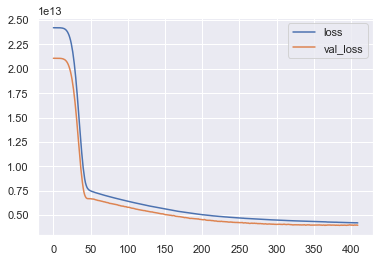

In [302]:
losses.plot()

# Evaluation on Test Data

In [303]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [304]:
predictions = model.predict(X_test)

mean_absolute_error(y_test,predictions)

In [306]:
explained_variance_score(y_test,predictions)

0.4499296745049093

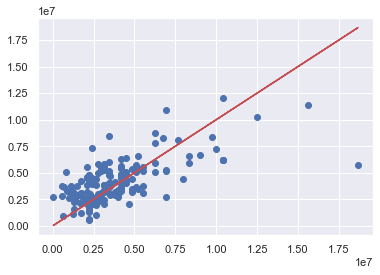

In [307]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

In [309]:
errors = y_test.reshape(173, 1) - predictions

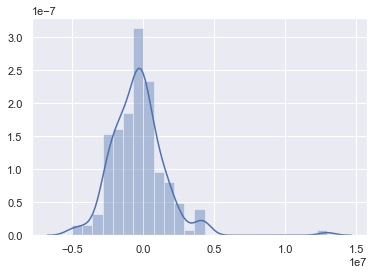

In [310]:
# We see that on the far right tail we had error values over 1 million
# The high paid players are most likely making it difficult 
# to predict salary
sns.distplot(errors)

### Predicting on a new player

In [311]:
new_player = premier_league.drop('annual_salary',axis=1).iloc[0]

In [312]:
new_player = scaler.transform(new_player.values.reshape(-1, 62))

In [313]:
new_player

array([[0.73170732, 0.6396349 , 0.46461988, 0.51929825, 0.40994152,
        0.52631579, 0.52631579, 0.42105263, 0.        , 0.        ,
        0.        , 0.07142857, 0.125     , 0.        , 0.        ,
        0.        , 0.14285714, 0.16666667, 0.09090909, 0.2972973 ,
        0.38709677, 0.23255814, 0.06666667, 0.        , 0.00266667,
        0.00266667, 0.        , 0.        , 0.        , 0.        ,
        0.18063584, 0.20396601, 0.87777778, 0.46461988, 0.46461988,
        0.01466993, 0.69761905, 0.46190476, 0.46022727, 0.65625   ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [314]:
model.predict(new_player)

array([[3436446.]], dtype=float32)

In [316]:
premier_league.iloc[0]['annual_salary']

3470740.0

In [317]:
# Wow when we created a new player and added him to the dataset we
# were able to predict his salary within $40,000
# It is interesting to note that most likely the highest paid players
# are making it difficult to predict salary values
# So let's remove the top 1% of highest paid players and run it back

# Removing top 4% of paid players

In [349]:
# Remove the top 23 paid players
len(premier_league) *(0.04)

22.96

In [350]:
# We are going to remove players paid over $ 10 million
premier_league['annual_salary'].sort_values(ascending=False).head(23)

324    2.227058e+07
30     2.186566e+07
445    2.013029e+07
402    1.865523e+07
170    1.561833e+07
506    1.527126e+07
218    1.388296e+07
413    1.388296e+07
28     1.263706e+07
476    1.249466e+07
473    1.249466e+07
555    1.145344e+07
151    1.110637e+07
308    1.110637e+07
457    1.093283e+07
104    1.082871e+07
378    1.041222e+07
226    1.041222e+07
461    1.041222e+07
323    1.041222e+07
554    1.041222e+07
360    1.041222e+07
418    1.001175e+07
Name: annual_salary, dtype: float64

In [351]:
non_top_4_perc = premier_league.sort_values('annual_salary',
                ascending = False).iloc[23:]

In [353]:
non_top_4_perc['annual_salary'].sort_values(ascending=False).head(5)

232    9718072.0
249    9718072.0
227    9718072.0
260    9718072.0
293    9718072.0
Name: annual_salary, dtype: float64

## Scaling and Train Test Split (3rd run)

In [1139]:
X = non_top_4_perc.drop('annual_salary',axis=1).values
y = non_top_4_perc['annual_salary'].values

In [1140]:
from sklearn.model_selection import train_test_split

In [1141]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=3)

### Scaling

In [1142]:
from sklearn.preprocessing import MinMaxScaler

In [1143]:
scaler = MinMaxScaler()

In [1144]:
X_train = scaler.fit_transform(X_train)

In [1145]:
X_test = scaler.transform(X_test)

In [1146]:
X_train.shape

(385, 62)

In [1147]:
X_test.shape

(166, 62)

## Creating a Model

In [1148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [1149]:
model = Sequential()

model.add(Dense(62,activation='relu'))

model.add(Dense(31,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(8,activation='relu'))

#model.add(Dense(62,activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [1150]:
from tensorflow.keras.callbacks import EarlyStopping

In [1151]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [1152]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
        epochs=1000,verbose=1,callbacks=[early_stop])

Epoch 1/1000
13/13 [==============================] - 0s 13ms/step - loss: 16808530673664.0000 - val_loss: 14822280265728.0000
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 16808524382208.0000 - val_loss: 14822269779968.0000
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 16808511799296.0000 - val_loss: 14822255099904.0000
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 16808488730624.0000 - val_loss: 14822220496896.0000
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 16808435253248.0000 - val_loss: 14822141853696.0000
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 16808319909888.0000 - val_loss: 14821979324416.0000
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 16808088174592.0000 - val_loss: 14821661605888.0000
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 16807636238336.0000 - val_loss: 14821076500

Epoch 66/1000
13/13 [==============================] - 0s 4ms/step - loss: 4184683315200.0000 - val_loss: 3178367811584.0000
Epoch 67/1000
13/13 [==============================] - 0s 4ms/step - loss: 4168156971008.0000 - val_loss: 3171711188992.0000
Epoch 68/1000
13/13 [==============================] - 0s 4ms/step - loss: 4154581057536.0000 - val_loss: 3166600167424.0000
Epoch 69/1000
13/13 [==============================] - 0s 4ms/step - loss: 4142837006336.0000 - val_loss: 3161732415488.0000
Epoch 70/1000
13/13 [==============================] - 0s 4ms/step - loss: 4129606074368.0000 - val_loss: 3152066641920.0000
Epoch 71/1000
13/13 [==============================] - 0s 5ms/step - loss: 4124093448192.0000 - val_loss: 3145926967296.0000
Epoch 72/1000
13/13 [==============================] - 0s 4ms/step - loss: 4115524222976.0000 - val_loss: 3139141107712.0000
Epoch 73/1000
13/13 [==============================] - 0s 4ms/step - loss: 4109460307968.0000 - val_loss: 3132592488448.0000


13/13 [==============================] - 0s 4ms/step - loss: 3645767417856.0000 - val_loss: 2892595986432.0000
Epoch 132/1000
13/13 [==============================] - 0s 4ms/step - loss: 3641992019968.0000 - val_loss: 2898089476096.0000
Epoch 133/1000
13/13 [==============================] - 0s 3ms/step - loss: 3634370969600.0000 - val_loss: 2888731459584.0000
Epoch 134/1000
13/13 [==============================] - 0s 4ms/step - loss: 3624912289792.0000 - val_loss: 2882007465984.0000
Epoch 135/1000
13/13 [==============================] - 0s 4ms/step - loss: 3618464595968.0000 - val_loss: 2861119307776.0000
Epoch 136/1000
13/13 [==============================] - 0s 4ms/step - loss: 3604864303104.0000 - val_loss: 2849108656128.0000
Epoch 137/1000
13/13 [==============================] - 0s 3ms/step - loss: 3595144790016.0000 - val_loss: 2840420679680.0000
Epoch 138/1000
13/13 [==============================] - 0s 4ms/step - loss: 3597362528256.0000 - val_loss: 2835612172288.0000
Epoch 1

13/13 [==============================] - 0s 3ms/step - loss: 3231154176000.0000 - val_loss: 2657437876224.0000
Epoch 197/1000
13/13 [==============================] - 0s 3ms/step - loss: 3225217400832.0000 - val_loss: 2659604496384.0000
Epoch 198/1000
13/13 [==============================] - 0s 3ms/step - loss: 3222071934976.0000 - val_loss: 2658796830720.0000
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 3217679712256.0000 - val_loss: 2649919324160.0000
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 3208272674816.0000 - val_loss: 2639687843840.0000
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 3205990449152.0000 - val_loss: 2633126641664.0000
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 3201785921536.0000 - val_loss: 2632151203840.0000
Epoch 203/1000
13/13 [==============================] - 0s 3ms/step - loss: 3195362869248.0000 - val_loss: 2627712057344.0000
Epoch 2

13/13 [==============================] - 0s 3ms/step - loss: 2923221745664.0000 - val_loss: 2537388769280.0000
Epoch 262/1000
13/13 [==============================] - 0s 4ms/step - loss: 2920517468160.0000 - val_loss: 2531698409472.0000
Epoch 263/1000
13/13 [==============================] - 0s 4ms/step - loss: 2914123251712.0000 - val_loss: 2517853274112.0000
Epoch 264/1000
13/13 [==============================] - 0s 4ms/step - loss: 2905433178112.0000 - val_loss: 2511516467200.0000
Epoch 265/1000
13/13 [==============================] - 0s 4ms/step - loss: 2900674215936.0000 - val_loss: 2508634193920.0000
Epoch 266/1000
13/13 [==============================] - 0s 4ms/step - loss: 2896240312320.0000 - val_loss: 2502363185152.0000
Epoch 267/1000
13/13 [==============================] - 0s 8ms/step - loss: 2890740793344.0000 - val_loss: 2494568595456.0000
Epoch 268/1000
13/13 [==============================] - 0s 6ms/step - loss: 2885448105984.0000 - val_loss: 2488992530432.0000
Epoch 2

13/13 [==============================] - 0s 4ms/step - loss: 2686095196160.0000 - val_loss: 2400328613888.0000
Epoch 327/1000
13/13 [==============================] - 0s 4ms/step - loss: 2683619508224.0000 - val_loss: 2398954979328.0000
Epoch 328/1000
13/13 [==============================] - 0s 4ms/step - loss: 2681500598272.0000 - val_loss: 2415812673536.0000
Epoch 329/1000
13/13 [==============================] - 0s 4ms/step - loss: 2679273160704.0000 - val_loss: 2416138518528.0000
Epoch 330/1000
13/13 [==============================] - 0s 4ms/step - loss: 2675434061824.0000 - val_loss: 2407729725440.0000
Epoch 331/1000
13/13 [==============================] - 0s 3ms/step - loss: 2670841298944.0000 - val_loss: 2397763272704.0000
Epoch 332/1000
13/13 [==============================] - 0s 4ms/step - loss: 2670546649088.0000 - val_loss: 2390103425024.0000
Epoch 333/1000
13/13 [==============================] - 0s 3ms/step - loss: 2669794295808.0000 - val_loss: 2387818315776.0000
Epoch 3

13/13 [==============================] - 0s 5ms/step - loss: 2539224301568.0000 - val_loss: 2343585710080.0000
Epoch 392/1000
13/13 [==============================] - 0s 5ms/step - loss: 2546523963392.0000 - val_loss: 2372078403584.0000
Epoch 393/1000
13/13 [==============================] - 0s 4ms/step - loss: 2547236995072.0000 - val_loss: 2380759302144.0000
Epoch 394/1000
13/13 [==============================] - 0s 4ms/step - loss: 2539655266304.0000 - val_loss: 2362998784000.0000
Epoch 395/1000
13/13 [==============================] - 0s 4ms/step - loss: 2537392177152.0000 - val_loss: 2351594733568.0000
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 2531717808128.0000 - val_loss: 2345830449152.0000
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 2529263091712.0000 - val_loss: 2339720134656.0000
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 2530717728768.0000 - val_loss: 2334480662528.0000
Epoch 3

13/13 [==============================] - 0s 6ms/step - loss: 2456756420608.0000 - val_loss: 2312004960256.0000
Epoch 457/1000
13/13 [==============================] - 0s 5ms/step - loss: 2452775239680.0000 - val_loss: 2311844528128.0000
Epoch 458/1000
13/13 [==============================] - 0s 4ms/step - loss: 2450991874048.0000 - val_loss: 2311910064128.0000
Epoch 459/1000
13/13 [==============================] - 0s 4ms/step - loss: 2450916638720.0000 - val_loss: 2308853202944.0000
Epoch 460/1000
13/13 [==============================] - 0s 5ms/step - loss: 2453133590528.0000 - val_loss: 2305845886976.0000
Epoch 461/1000
13/13 [==============================] - 0s 4ms/step - loss: 2451781713920.0000 - val_loss: 2305503526912.0000
Epoch 462/1000
13/13 [==============================] - 0s 4ms/step - loss: 2450411749376.0000 - val_loss: 2306635202560.0000
Epoch 463/1000
13/13 [==============================] - 0s 5ms/step - loss: 2449229479936.0000 - val_loss: 2305412038656.0000
Epoch 4

13/13 [==============================] - 0s 4ms/step - loss: 2390864429056.0000 - val_loss: 2318183432192.0000
Epoch 522/1000
13/13 [==============================] - 0s 5ms/step - loss: 2394704052224.0000 - val_loss: 2316844662784.0000
Epoch 523/1000
13/13 [==============================] - 0s 4ms/step - loss: 2393155567616.0000 - val_loss: 2310264061952.0000
Epoch 524/1000
13/13 [==============================] - 0s 5ms/step - loss: 2389593030656.0000 - val_loss: 2307447848960.0000
Epoch 525/1000
13/13 [==============================] - 0s 4ms/step - loss: 2387410944000.0000 - val_loss: 2302643011584.0000
Epoch 526/1000
13/13 [==============================] - 0s 4ms/step - loss: 2386970542080.0000 - val_loss: 2307101294592.0000
Epoch 527/1000
13/13 [==============================] - 0s 3ms/step - loss: 2385741086720.0000 - val_loss: 2307507617792.0000
Epoch 528/1000
13/13 [==============================] - 0s 4ms/step - loss: 2386594103296.0000 - val_loss: 2314015604736.0000
Epoch 5

In [1153]:
losses = pd.DataFrame(model.history.history)

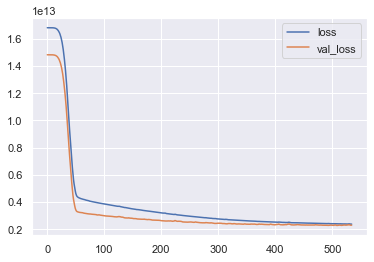

In [1154]:
losses.plot()

# Evaluation on Test Data

In [1155]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [1156]:
predictions = model.predict(X_test)

In [1157]:
# Able to lower the error $200,000 when working with the non_top_4_pct
mean_absolute_error(y_test,predictions)

1193259.37054836

In [1158]:
explained_variance_score(y_test,predictions)

0.35283392677289316

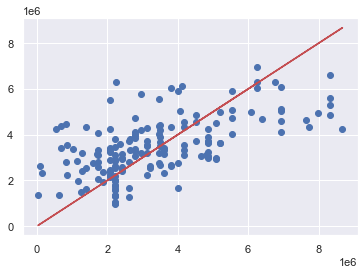

In [1159]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

In [1160]:
errors = y_test.reshape(166, 1) - predictions

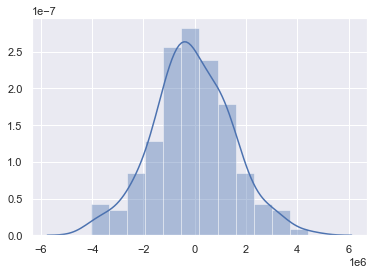

In [1161]:
sns.distplot(errors)

In [1162]:
premier_league.to_csv('premier_league_players_clean.csv')
non_top_4_perc.to_csv('non_top_4_perc_clean.csv')